In [1]:
import os
os.chdir('E:/4 SNU/PYTHON ML FILES')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('train_cleaned.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [6]:
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [7]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, random_state = 56)

In [9]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [10]:
lr = LR()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error ', k)

Training Mean Absolute Error  821.4206146753681


In [12]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error ', k)

Test Mean Absolute Error  875.2688982985245


In [13]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

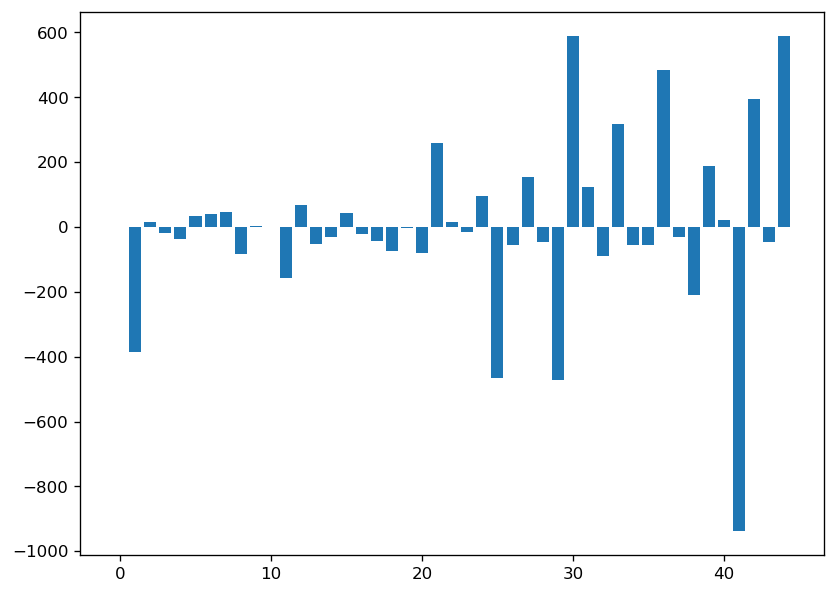

In [18]:
plt.figure(figsize = (8,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel = 'Variables'
plt.ylabel = 'Coefficients'
plt.title = 'Coefficient Plot'

# Checking Assumptions of Linear Model

In [20]:
residuals = pd.DataFrame({'Fitted Values' : test_y, 'Predicted Values' : test_predict})
residuals['residuals'] = residuals['Fitted Values'] - residuals['Predicted Values'] 
residuals.head()

,Fitted Values,Predicted Values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


# Plot Residual Curve(Is there Constant Variance?)

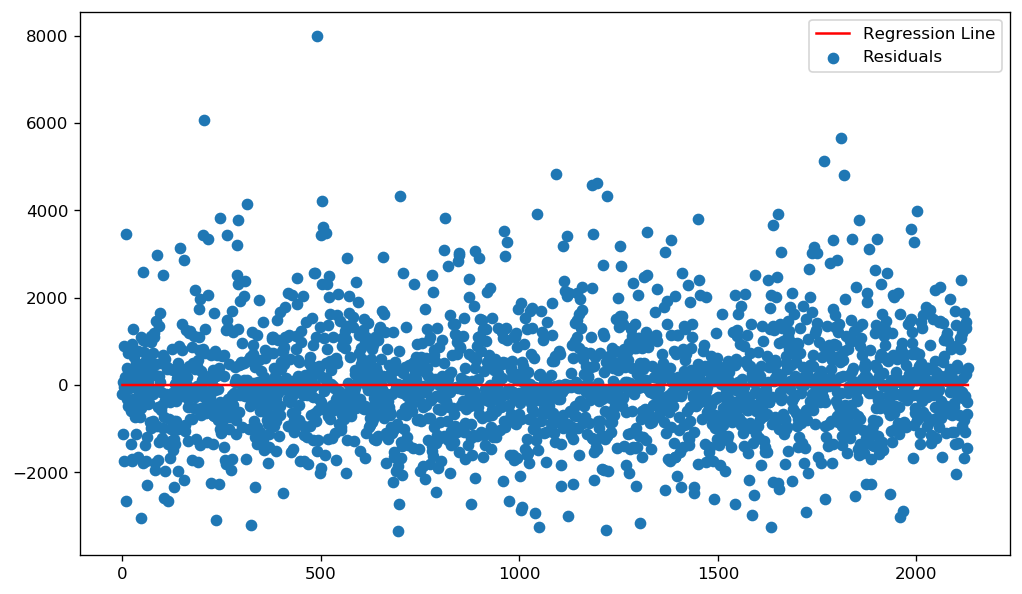

In [23]:
plt.figure(figsize=(10,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
f = range(0, 2131)
k = [0 for i in f]
plt.scatter(f, residuals.residuals[:], label = 'Residuals')
plt.plot(f, k, color = 'red', label = 'Regression Line')
plt.xlabel = 'Fitted Points'
plt.ylabel = 'Residuals'
plt.title = 'Residual Plot'
plt.ylim = (-4000, 4000)
plt.legend()

# Checking Distribution of Residuals

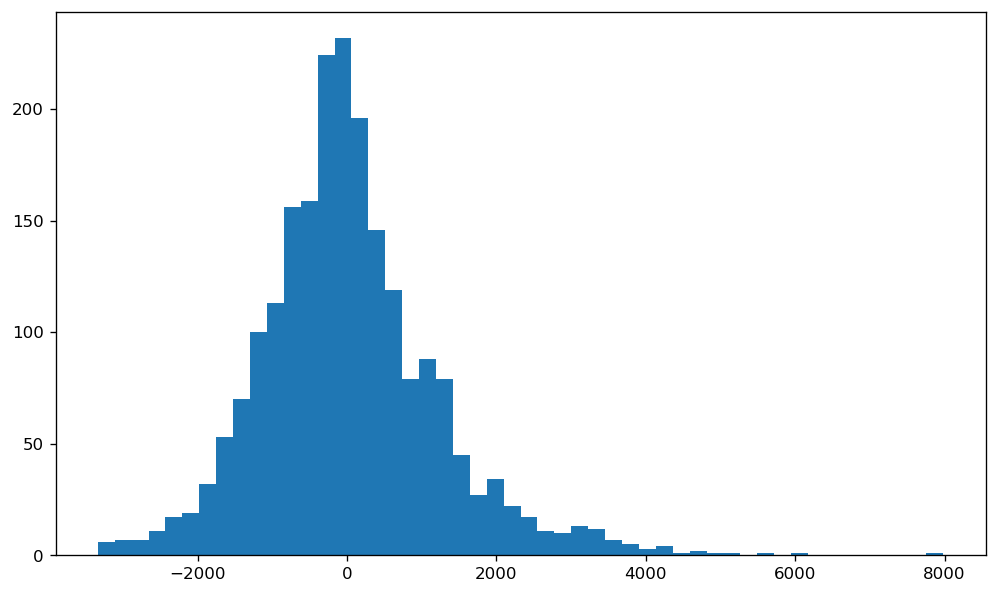

In [24]:
plt.figure(figsize=(10,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
plt.hist(residuals.residuals, bins = 50)
plt.xlabel = 'Error'
plt.ylabel = 'Frequency'
plt.title = 'Distribution ofError Terms'
plt.show()

# QQ-Plot(Is the data normally distributed)

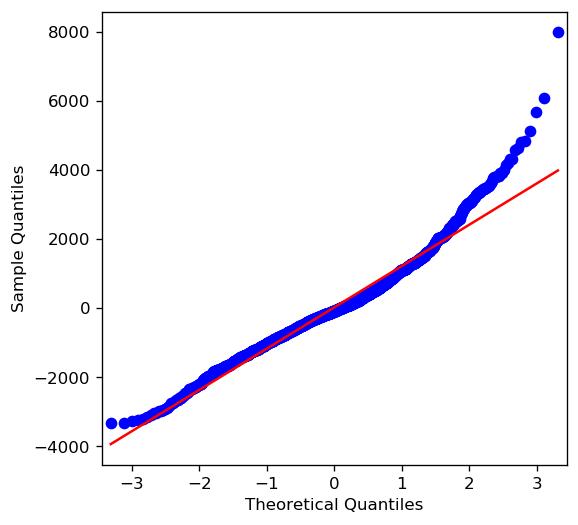

In [27]:
from statsmodels.graphics.gofplots import qqplot
fiq, ax = plt.subplots(figsize = (5,5), dpi = 120)
qqplot(residuals.residuals, line = 's', ax=ax)
plt.ylabel = 'Residual Quantiles'
plt.xlabel = 'Ideal Scaled Quantiles'
plt.title = 'Checking Distributionof Residual Errors'
plt.show()

# Variance Inflation Factor(VIF) (Checking for multi-collinearity)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant

VIF = pd.Series([VIF(data.values, i) for i in range(data.shape[1])], index = data.columns)
VIF

E:\4 SNU\Python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

# Model Interpretability

In [30]:
lr = LR(normalize = True)
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Train Mean Absolute Error ', k)

Train Mean Absolute Error  822.467098060075


In [34]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error ', k)

Test Mean Absolute Error  876.2396900985453


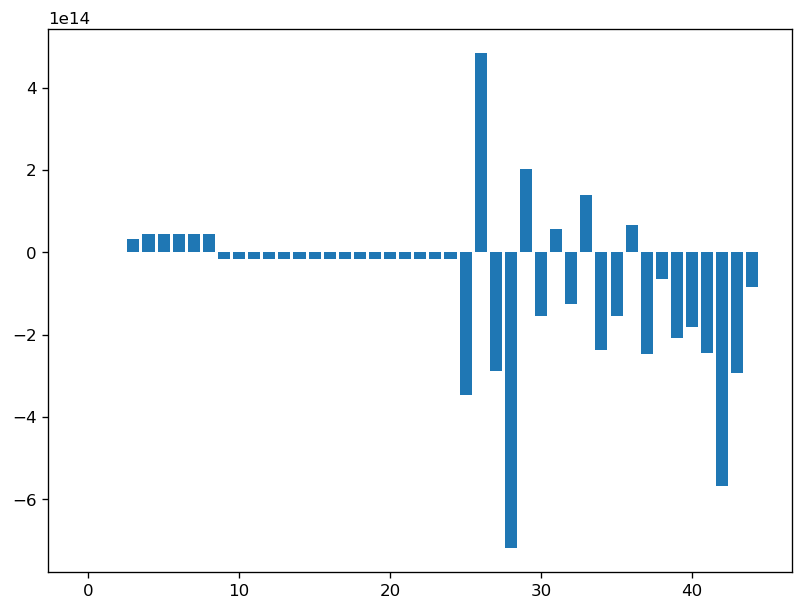

In [35]:
plt.figure(figsize = (8,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel = 'Variables'
plt.ylabel = 'Coefficients'
plt.title = 'Normalized Coefficient Plot'

# Creating new subsets of data

In [38]:
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [39]:
Coefficients = pd.DataFrame({'Variables' : x.columns, 'Coefficients' : lr.coef_})
Coefficients.head()

,Variables,Coefficients
0,Item_Weight,2.126864e-01
1,Item_Visibility,-3.853014e+02
2,Item_MRP,1.549768e+01
3,Outlet_Establishment_Year,3.211367e+13
4,Item_Fat_Content_LF,4.564857e+13


# Choosing variables with significance greater than 0.5(Filtering significant Features)

In [41]:
sig_var = Coefficients[Coefficients.Coefficients > 0.5]

# Extracting the significant subset to independent variables

In [42]:
subset = data[sig_var['Variables'].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Size_Medium
0,249.8092,1999,0,1,0,0,0,0,0,0,0,1
1,48.2692,2009,0,0,1,0,0,0,0,0,0,1
2,141.6180,1999,0,1,0,0,0,0,0,0,0,1
3,182.0950,1998,0,0,1,0,0,0,0,0,0,0
4,53.8614,1987,0,1,0,0,0,1,0,0,0,0


# Splitting data into train and test sets

In [43]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(subset, y, random_state = 56)

# Implementing Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

# Training Model

In [45]:
lr = LR()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Over Train Set

In [46]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error ', k)

Training Mean Absolute Error  917.3099588158154


# Predicting Over Test Set

In [47]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error ', k)

Test Mean Absolute Error  977.8395230493461


# Plotting the coefficients

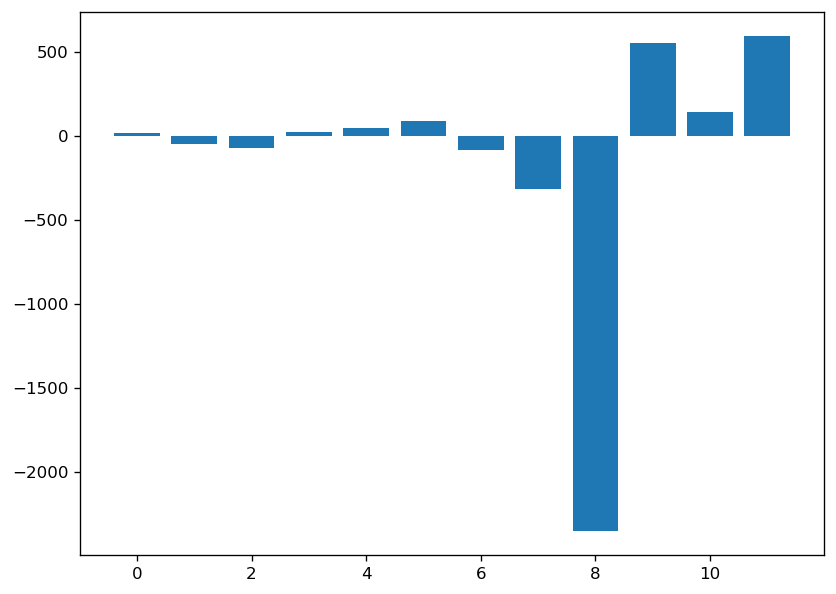

In [49]:
plt.figure(figsize = (8,6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel = 'Variables'
plt.ylabel = 'Coefficients'
plt.title = 'Normalized Coefficient Plot'